# Final Project

### Shortcuts
- [Cleaning the Data](#section 1)<br>
- [Visualisations](#section 2)<br>
- [Color Space Visualisations](#section last)<br>

#### Dependencies

In [76]:
import numpy as np
from datascience import *
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
#%matplotlib inline
#plt.style.use('fivethirtyeight')

from bokeh.plotting import figure, output_file, show
import seaborn as sns

from colormath.color_objects import *
from colormath.color_conversions import convert_color

In [77]:
#for plotting
from wcsHelper import *
munsell_to_chip, chip_to_munsell, chip_to_clab, chip_to_rgb = readChipData('chipnum-info.txt')

# Data<a id='section 1'>

In [3]:
from wcs_helper_functions import *
from wcs_table_helper import *

coord_to_index, index_to_coord = readChipData('./WCS_data_core/chip.txt')
coordToIndexTable, indexToCoordTable = loadChipTables(coord_to_index, index_to_coord)

index_to_clab = readClabData('./WCS_data_core/cnum-vhcm-lab-new.txt')
clabTable = loadClabTable(index_to_clab)

namingData = readNamingData('./WCS_data_core/term.txt')
namingTable = loadNamingTable(namingData)

fociData = readFociData('./WCS_data_core/foci-exp.txt')
fociTable = loadFociTable(fociData)

speakerData = readSpeakerData('./WCS_data_core/spkr-lsas.txt')
speakerTable = loadSpeakerTable(speakerData)

In [196]:
ctit = coordToIndexTable.join('Index', clabTable)
ctit

Index,Coordinate,l,a,b
1,E29,61.70,-4.52,-39.18
2,C23,81.35,-19.64,-4.30
3,F4,51.57,55.20,68.32
4,I36,20.54,24.14,-14.33
5,C20,81.35,-33.04,4.96
6,C6,81.35,14.87,30.96
7,E15,61.70,-46.97,64.65
8,H40,30.77,47.63,5.24
9,G6,41.22,22.15,41.13
10,I30,20.54,7.63,-35.92


In [6]:
def str_to_float(arr):
    new_arr = np.array([])
    for i in arr:
        new_arr = np.append(new_arr, float(i))
    return new_arr

clabsort = Table().with_column('Index', np.arange(1, 331))
for i in np.arange(1, 4):
    label = ['l', 'l', 'a', 'b']
    flt = str_to_float(clabTable.column(i))
    clabsort = clabsort.with_column(label[i], flt)
clabsort

Index,l,a,b
1,61.7,-4.52,-39.18
2,81.35,-19.64,-4.3
3,51.57,55.2,68.32
4,20.54,24.14,-14.33
5,81.35,-33.04,4.96
6,81.35,14.87,30.96
7,61.7,-46.97,64.65
8,30.77,47.63,5.24
9,41.22,22.15,41.13
10,20.54,7.63,-35.92


In [259]:
indexcoordtable = indexToCoordTable.join('Coordinate', ctit, 'Index').relabel(3, 'index').drop(4, 5, 6)
indexcoordclabtable = indexcoordtable.join('Coordinate', clabsort, 'Index')
indexcoordclabtable

Coordinate,Lightness,Hue,index,l,a,b
1,E,29,E29,61.7,-4.52,-39.18
2,C,23,C23,81.35,-19.64,-4.3
3,F,4,F4,51.57,55.2,68.32
4,I,36,I36,20.54,24.14,-14.33
5,C,20,C20,81.35,-33.04,4.96
6,C,6,C6,81.35,14.87,30.96
7,E,15,E15,61.7,-46.97,64.65
8,H,40,H40,30.77,47.63,5.24
9,G,6,G6,41.22,22.15,41.13
10,I,30,I30,20.54,7.63,-35.92


In [260]:
ft_w_ind = fociTable.with_column('Chip (foci)', [fociTable.column('Foci')[i].replace(':', "") for i in range(len(fociTable.column('Foci')))])
ft_w_ind

Language,Speaker,Term,Foci,Chip (foci)
1,1,LF,A:0,A0
1,1,WK,D:9,D9
1,1,WK,D:10,D10
1,1,WK,D:11,D11
1,1,WK,D:12,D12
1,1,F,D:25,D25
1,1,LB,J:0,J0
1,1,G,F:17,F17
1,1,LE,F:1,F1
1,1,LE,F:2,F2


In [261]:
index = 1
speaker = ft_w_ind.column('Speaker')
response = np.array([])
for i in range(ft_w_ind.num_rows):
    if speaker[i] != speaker[i-1]:
        index = 1
        response = np.append(response, index)
    else:
        index += 1
        response = np.append(response, index)

In [262]:
ft_indresp = ft_w_ind.with_column('foci num', response)
ft_indresp 

Language,Speaker,Term,Foci,Chip (foci),foci num
1,1,LF,A:0,A0,1
1,1,WK,D:9,D9,2
1,1,WK,D:10,D10,3
1,1,WK,D:11,D11,4
1,1,WK,D:12,D12,5
1,1,F,D:25,D25,6
1,1,LB,J:0,J0,7
1,1,G,F:17,F17,8
1,1,LE,F:1,F1,9
1,1,LE,F:2,F2,10


In [263]:
df = pd.read_table('lang.txt', delim_whitespace=True, names=('language', 'country', 'p1', '2', '3', '4', '5','fill'))
lang_papua = df[df['country']=='Papua'].index.get_values()
lang_papua

array([ 2,  6,  8, 11, 63, 69, 97])

In [264]:
#sorted
ft_ir = ft_indresp.join('Chip (foci)', indexcoordclabtable
                        , 'index').sort('foci num').sort('Speaker').sort('Language')
ft_ir

Chip (foci),Language,Speaker,Term,Foci,foci num,Coordinate,Lightness,Hue,l,a,b
A0,1,1,LF,A:0,1,141,A,0,96,-0.06,0.06
D9,1,1,WK,D:9,2,326,D,9,71.6,6.22,81.95
D10,1,1,WK,D:10,3,146,D,10,71.6,-2.3,85.64
D11,1,1,WK,D:11,4,258,D,11,71.6,-9.51,87.14
D12,1,1,WK,D:12,5,193,D,12,71.6,-15.98,87.62
D25,1,1,F,D:25,6,49,D,25,71.6,-22.32,-14.67
J0,1,1,LB,J:0,7,89,J,0,15.6,-0.02,0.02
F17,1,1,G,F:17,8,202,F,17,51.57,-63.28,28.95
F1,1,1,LE,F:1,9,321,F,1,51.57,59.36,19.67
F2,1,1,LE,F:2,10,298,F,2,51.57,58.01,30.52


In [266]:
lang8_61 = ft_ir.where('Language', are.contained_in(lang_papua))
lang8_61

Chip (foci),Language,Speaker,Term,Foci,foci num,Coordinate,Lightness,Hue,l,a,b
B12,2,1,AA,B:12,1,106,B,12,91.08,-12.17,45.9
A0,2,1,EP,A:0,2,141,A,0,96,-0.06,0.06
F28,2,1,IT,F:28,3,34,F,28,51.57,-11.88,-38.56
F39,2,1,NR,F:39,4,65,F,39,51.57,59.69,1.53
J0,2,1,TK,J:0,5,89,J,0,15.6,-0.02,0.02
E19,2,1,YN,E:19,6,310,E,19,61.7,-52.09,10.63
C11,2,2,AA,C:11,1,12,C,11,81.35,-10.94,87.9
B6,2,2,AT,B:6,2,290,B,6,91.08,4.3,10.08
A0,2,2,EP,A:0,3,141,A,0,96,-0.06,0.06
F29,2,2,IT,F:29,4,164,F,29,51.57,-3.41,-48.08


----

# Lightness in WCS Data

In [267]:
#change lightness from letters to numbers
letters = lang8_61.column('Lightness')
num2let = {let: num for num, let in dict(enumerate(np.unique(letters), 1)).items()}
num_lightness = np.array([])
for i in letters:
    num_lightness = np.append(num_lightness, num2let[i])
lang8_61 = lang8_61.with_column('lightness (num)', num_lightness).move_to_end('Lightness').move_to_end('Hue').move_to_end('Chip (foci)')


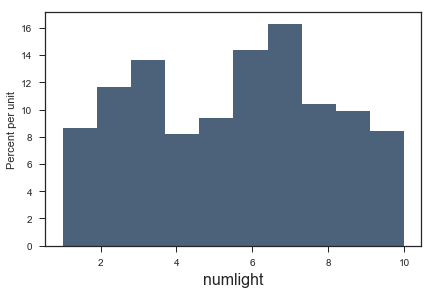

In [268]:
num2let = {let: num for num, let in dict(enumerate(np.unique(ft_ir.column('Lightness')), 1)).items()}
num_lightness = np.array([])
for i in ft_ir.column('Lightness'):
    num_lightness = np.append(num_lightness, num2let[i])
ft_ir.with_column('numlight', num_lightness).hist('numlight')

----

Change age from string to integer

In [269]:
int_age = str_to_float(speakerTable.column('Age'))
speakerTable = speakerTable.with_column('Age (int)', int_age)

In [270]:
nt8_61 = namingTable.where('Language', are.contained_in([8, 61]))
nt8_61

Language,Speaker,Index,Term
8,1,1,A
8,1,2,A
8,1,3,AM
8,1,4,N
8,1,5,T
8,1,6,I
8,1,7,IS
8,1,8,NS
8,1,9,NA
8,1,10,K


In [30]:
from wcsHelper import *

langdict = readNamingData()
maxmin = {'max': ['lang', 0], 'min': [['lang', 5]]} #arbitrarily set 5 because no language has 0 unique color terms
for i in np.arange(1, 110+1):
    v = len(set(list(langdict[i][1].values())))
    if v > maxmin['max'][1]:
        maxmin['max'] = [i, v]
    elif v < maxmin['min'][0][1]:
        maxmin['min'] = [[i, v]]
    elif v == maxmin['min'][0][1]:
        maxmin['min'].append([i, v])
    elif v == maxmin['max'][0]:
        maxmin['max'].append([i, v])
maxmin

{'max': [91, 20], 'min': [[50, 3], [56, 3], [77, 3], [104, 3], [105, 3]]}

In [243]:
speakerTable

Language,Speaker,Age,Gender
1,1,90,M
1,2,26,M
1,3,38,M
1,4,35,M
1,5,80,M
1,6,48,M
1,7,26,M
1,8,39,M
1,9,47,F
1,10,49,M


In [153]:
speakerTable.where('Language', 61)

Language,Speaker,Age,Gender,Age (int)
61,14,45,M,45
61,1,20,F,20
61,9,28,M,28
61,4,11,M,11
61,9,28,M,28
61,10,30,M,30
61,12,47,M,47
61,3,45,F,45
61,7,27,M,27
61,8,28,M,28


# Visualising the data<a id='section 2'>

Plotting correlation matrix, pairplots, and histograms

# Color Space Visualisations<a id='section last'>

In [78]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [79]:
from colormath.color_objects import sRGBColor
from colormath.color_conversions import convert_color

In [80]:
lz = data.column('l')
a_x = data.column('a')
by = data.column('b')

In [124]:
hexcolor = make_array()
for i in np.arange(len(a_x)):
    lab = LabColor(lz[i], a_x[i], by[i])
    rgb = convert_color(lab, sRGBColor)
    hexcolor = np.append(hexcolor, rgb.get_rgb_hex())

colors = []
for i in np.arange(len(a_x)):
    lab = LabColor(lz[i], a_x[i], by[i])
    rgb = convert_color(lab, sRGBColor)
    r = str(rgb.get_value_tuple()[0] * 255)
    g = str(rgb.get_value_tuple()[1] * 255)
    b = str(rgb.get_value_tuple()[2] * 255)
    color = 'rgb(152, 0, 0)'
    colors += ['rgb('+ r + ', ' + g +', ' +  b + ')']

In [82]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='jasonsjiang', api_key='AIzrMaB4zhCuQ8U49Vx1')

In [83]:
all_color = go.Scatter3d(
    x=a_x,
    y=by,
    z=lz,
    mode='markers',
    marker=dict(
        size=8.5,
        color=colors,  
        opacity=0.8))

data = [all_color]
layout = go.Layout(
    title='Color Space (LAB to RGB)',
    scene = dict(
        xaxis = dict(title='a*'),
        yaxis = dict(title='b*'),
        zaxis = dict(title='L*'),),
    width=700,
    margin = dict(l=0, r=0, b=0, t=0)
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, file='LABColor')

In [116]:
%matplotlib inline
plt.style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import *

In [125]:
colorzzz = []
for i in np.arange(len(a_x)):
    lab = LabColor(lz[i], a_x[i], by[i])
    rgb = convert_color(lab, sRGBColor)
    r = rgb.get_value_tuple()[0]
    g = rgb.get_value_tuple()[1]
    b = rgb.get_value_tuple()[2]
    colorzzz.append((r, g, b))
colorzzz

a = np.array([colorzzz[0]])
for i in np.arange(0, 330):
    a = np.vstack([a, colorzzz[i]])
numbered = a[1:]

In [128]:
#correct the index 
def find(lst):
    index = 0
    for i in lst:
        if i == '#100be00':
            return index
        index += 1
fix = find(hexcolor)
hexcolor[fix] = '#00be00'

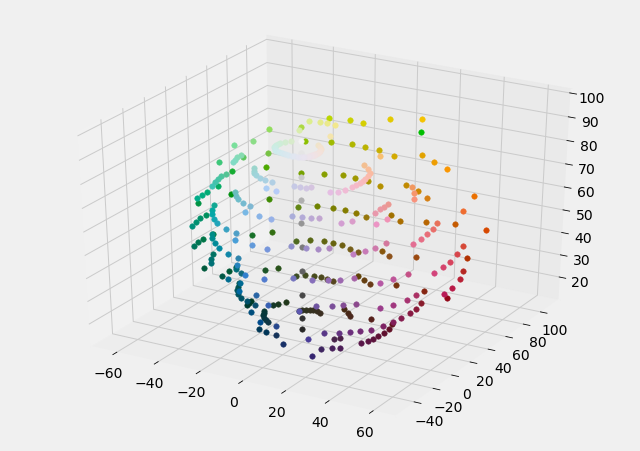

In [130]:
fig = plt.figure(figsize = (10, 7.5))
ax = fig.add_subplot(111, projection='3d')

for i in np.arange(330):
    ax.scatter(a_x[i], by[i], lz[i], color = matplotlib.colors.to_rgba(hexcolor[i]), s=30)
plt.show()

In [100]:
hexcolor = make_array()
for i in np.arange(len(a_x)):
    lab = LabColor(lz[i], a_x[i], by[i])
    rgb = convert_color(lab, sRGBColor)
    hexcolor = np.append(hexcolor, rgb.get_rgb_hex())

In [89]:
def plot_colors(colors):
    hexcolor = np.array([])
    for i in np.arange(len(colors)):
        L = colors[i][0]
        A = colors[i][1]
        B = colors[i][2]
        lab = LabColor(L, A, B)
        rgb = convert_color(lab, sRGBColor)
        hexcolor = np.append(hexcolor, rgb.get_rgb_hex())
    fig = plt.figure(figsize = (10, 7.5))
    ax = fig.add_subplot(111, projection='3d')
    for i in np.arange(330):
        ax.scatter(A, B, L, color = matplotlib.colors.to_rgba(hexcolor[i]), s=30)
    plt.show()

In [143]:
#for plotting
from wcsHelper import *
munsell_to_chip, chip_to_munsell, chip_to_clab, chip_to_rgb = readChipData('chipnum-info.txt')

lg86sp1 = langdict[73][1]
grid861 = naming2grid(lg86sp1, chip_to_rgb)
colors = grid861
tx = [i[1]*100 for i in colors]
ty = [i[2]*100 for i in colors]
tz = [i[0]*100 for i in colors]

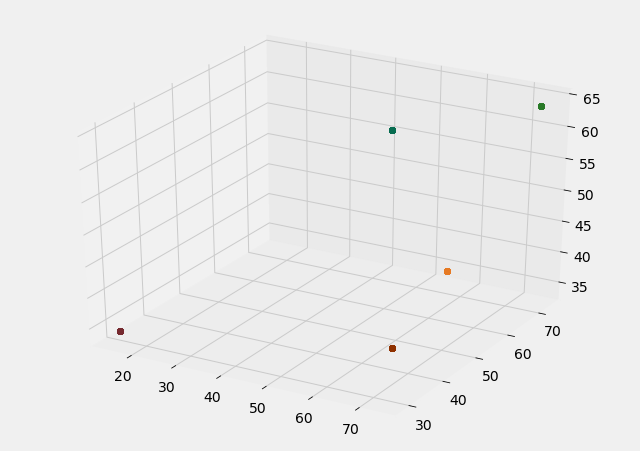

In [144]:
hexcolor = np.array([])
for i in np.arange(len(colors)):
    lab = LabColor(tx[i], ty[i], tz[i])
    rgb = convert_color(lab, sRGBColor)
    hexcolor = np.append(hexcolor, rgb.get_rgb_hex())
for i in range(len(hexcolor)):
    if len(hexcolor[i]) > 7:
        hexcolor[i] = '#'+str(hexcolor[i][2:])
fig = plt.figure(figsize =(10, 7.5))
ax = fig.add_subplot(111, projection='3d')
for i in np.arange(330):
    ax.scatter(tz[i], tx[i], ty[i], color = matplotlib.colors.to_rgba(hexcolor[i]), s=40)
plt.show()

In [45]:
#for plotly
test_colors = []
tx = [i[1]*100 for i in colors]
ty = [i[2]*100 for i in colors]
tz = [i[0]*100 for i in colors]
for i in np.arange(len(tx)):
    lab = LabColor(tx[i], ty[i], tz[i])
    rgb = convert_color(lab, sRGBColor)
    r = str(rgb.get_value_tuple()[0] * 255)
    g = str(rgb.get_value_tuple()[1] * 255)
    b = str(rgb.get_value_tuple()[2] * 255)
    test_colors += ['rgb('+ r + ', ' + g +', ' +  b + ')']